In [1]:
# Importing required libraries
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
# Read data from an Excel file named "Data_m.xlsx" and store it in a DataFrame

df = pd.read_excel("Data_m.xlsx")

In [3]:
# Read data from the first sheet (sheet index 0) of the Excel file "Data_m.xlsx"
transaction = pd.read_excel("Data_m.xlsx",sheet_name = 0)

#Read data from the second sheet
CustomerDemographic = pd.read_excel("Data_m.xlsx", sheet_name =1)

#Read data from the third sheet
CustomerAddress = pd.read_excel("Data_m.xlsx", sheet_name = 2)

In [4]:
# Merge the 'transaction' DataFrame with the 'CustomerAddress' DataFrame based on the 'customer_id' column
a = transaction.merge(CustomerAddress, how='inner', on = "customer_id")

# Merge the 'CustomerDemographic' DataFrame with the merged DataFrame 'a' based on the 'customer_id' column
b = CustomerDemographic.merge(a,how='inner', on = "customer_id")

# This code merges the 'CustomerDemographic' DataFrame with the previously merged DataFrame 'a' using an inner join on the 'customer_id' column.

# Check for missing values in the DataFrame 'b' and calculate the sum of missing values for each column
b.isnull().sum()

customer_id                               0
first_name                                0
last_name                               638
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     438
job_title                              2350
job_industry_category                     0
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
Age                                     438
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                      

In [5]:
#Creates a copy of DataFrame 'b'
DataFrame = b.copy()

In [6]:
# Calculate the sum of missing values in each column of the 'CustomerAddress' DataFrame
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [7]:
# Calculate the sum of missing values in each column of the 'CustomerDemographic' DataFrame
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                     87
dtype: int64

In [8]:
# Get the column names of the DataFrame 'b'
b.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [9]:
b.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,235.63,125.07,38482,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,1577.53,826.51,39526,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,low,small,1720.70,1531.42,37823,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,360.40,270.30,37873,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,71.49,53.62,38573,060 Morning Avenue,2016,New South Wales,Australia,10


In [10]:
# Calculate the profit by subtracting 'standard_cost' from 'list_price' and add it as a new column 'profit' in DataFrame 'b'
b['profit'] = b['list_price'] - b['standard_cost']

In [11]:
# Remove specified columns from DataFrame 'b' using the drop()
b.drop(['transaction_id','country','address','order_status','transaction_date','deceased_indicator','job_title','DOB','first_name','last_name','list_price','standard_cost'],inplace = True,axis = 1)

In [12]:
# Create a list of column names to be selected from DataFrame 'b'
list = ['gender',
        'job_industry_category', 'wealth_segment', 'owns_car',
         'online_order', 'brand', 'product_line', 'product_class',
        'product_size', 'product_first_sold_date', 'postcode', 'state',
        'property_valuation', 'profit']

In [13]:
# Iterate through the list of column names and print unique values for each column in DataFrame 'b'
for i in list:
    print("________________"+i+"_____________")
    print(b[i].unique())

________________gender_____________
['Female' 'Male' 'Unspecified']
________________job_industry_category_____________
['Health' 'Financial Services' 'IT' 'Retail' 'Agriculture' 'Property'
 'Manufacturing' 'Telecommunications' 'Entertainment']
________________wealth_segment_____________
['Mass Customer' 'High Net Worth' 'Affluent Customer']
________________owns_car_____________
['Yes' 'No']
________________online_order_____________
[0 1]
________________brand_____________
['OHM Cycles' 'Solex' 'Trek Bicycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']
________________product_line_____________
['Standard' 'Road' 'Mountain' 'Touring']
________________product_class_____________
['medium' 'low' 'high']
________________product_size_____________
['medium' 'small' 'large']
________________product_first_sold_date_____________
[38482 39526 37823 37873 38573 33552 33455 37337 40618 37838 35378 40784
 38206 37874 34143 33364 36361 40410 41848 42226 38258 37499 42404 42172
 36367 40336 41922 4

In [14]:
# Iterate through the list of column names & print the no.of unique values & their counts for each column in DataFrame 'b'
for i in list:
    print("________________"+i+"_____________")
    print(b[i].nunique())
    print(b[i].value_counts())

________________gender_____________
3
Female         9900
Male           9419
Unspecified     446
Name: gender, dtype: int64
________________job_industry_category_____________
9
Manufacturing         5369
Financial Services    5264
Health                3436
Retail                1746
Property              1278
IT                    1060
Entertainment          694
Agriculture            566
Telecommunications     352
Name: job_industry_category, dtype: int64
________________wealth_segment_____________
3
Mass Customer        9923
High Net Worth       5040
Affluent Customer    4802
Name: wealth_segment, dtype: int64
________________owns_car_____________
2
Yes    9942
No     9823
Name: owns_car, dtype: int64
________________online_order_____________
2
1    10082
0     9683
Name: online_order, dtype: int64
________________brand_____________
6
Solex             4246
Giant Bicycles    3308
WeareA2B          3288
OHM Cycles        3037
Trek Bicycles     2982
Norco Bicycles    2904
Name: brand

In [15]:
# List of columns for label encoding
label_encoding= ['wealth_segment','brand','job_industry_category','product_line']

# List of columns for one-hot encoding
hot_encoding =['owns_car','product_class','product_size','state','gender']

In [16]:
# Import the preprocessing module from scikit-learn for label encoding
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
# The label_encoder object will be used to perform label encoding on categorical data.
label_encoder = preprocessing.LabelEncoder()


In [17]:
# Perform label encoding for columns specified in the 'label_encoding' list
for i in label_encoding:
    # Encode labels in column 'species'.
    b[i]= label_encoder.fit_transform(b[i])

In [18]:
# Perform one-hot encoding for columns specified in the 'hot_encoding' list
for j in hot_encoding:
    b = pd.get_dummies(b,columns = [j],drop_first=True)
    
     # Use pd.get_dummies() to create binary columns for each category within the specified column
    # 'drop_first=True' drops the first category to prevent multicollinearity

In [19]:
# Check for null values
list_b = ['customer_id', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'tenure', 'Age',
       'product_id', 'online_order', 'brand', 'product_line',
       'product_first_sold_date', 'postcode', 'property_valuation', 'profit',
       'owns_car_Yes', 'product_class_low', 'product_class_medium',
       'product_size_medium', 'product_size_small', 'state_Queensland',
       'state_Victoria', 'gender_Male', 'gender_Unspecified']
for k in list_b:
    print("________"+k+"_________")
    print(b[k].isnull().sum())
    
# This code iterates through the columns listed in 'list_b' and checks for the count of null values in each column.


________customer_id_________
0
________past_3_years_bike_related_purchases_________
0
________job_industry_category_________
0
________wealth_segment_________
0
________tenure_________
0
________Age_________
438
________product_id_________
0
________online_order_________
0
________brand_________
0
________product_line_________
0
________product_first_sold_date_________
0
________postcode_________
0
________property_valuation_________
0
________profit_________
0
________owns_car_Yes_________
0
________product_class_low_________
0
________product_class_medium_________
0
________product_size_medium_________
0
________product_size_small_________
0
________state_Queensland_________
0
________state_Victoria_________
0
________gender_Male_________
0
________gender_Unspecified_________
0


In [20]:
# Calculate the median value of the 'Age' column in DataFrame 'b'
media_b = b['Age'].median()

In [21]:
# Fill missing values in the 'Age' column with the calculated median value
b['Age'].fillna(media_b,inplace = True)

In [22]:
# Check the count of remaining missing values in the 'Age' column after filling with median
b['Age'].isnull().sum()

0

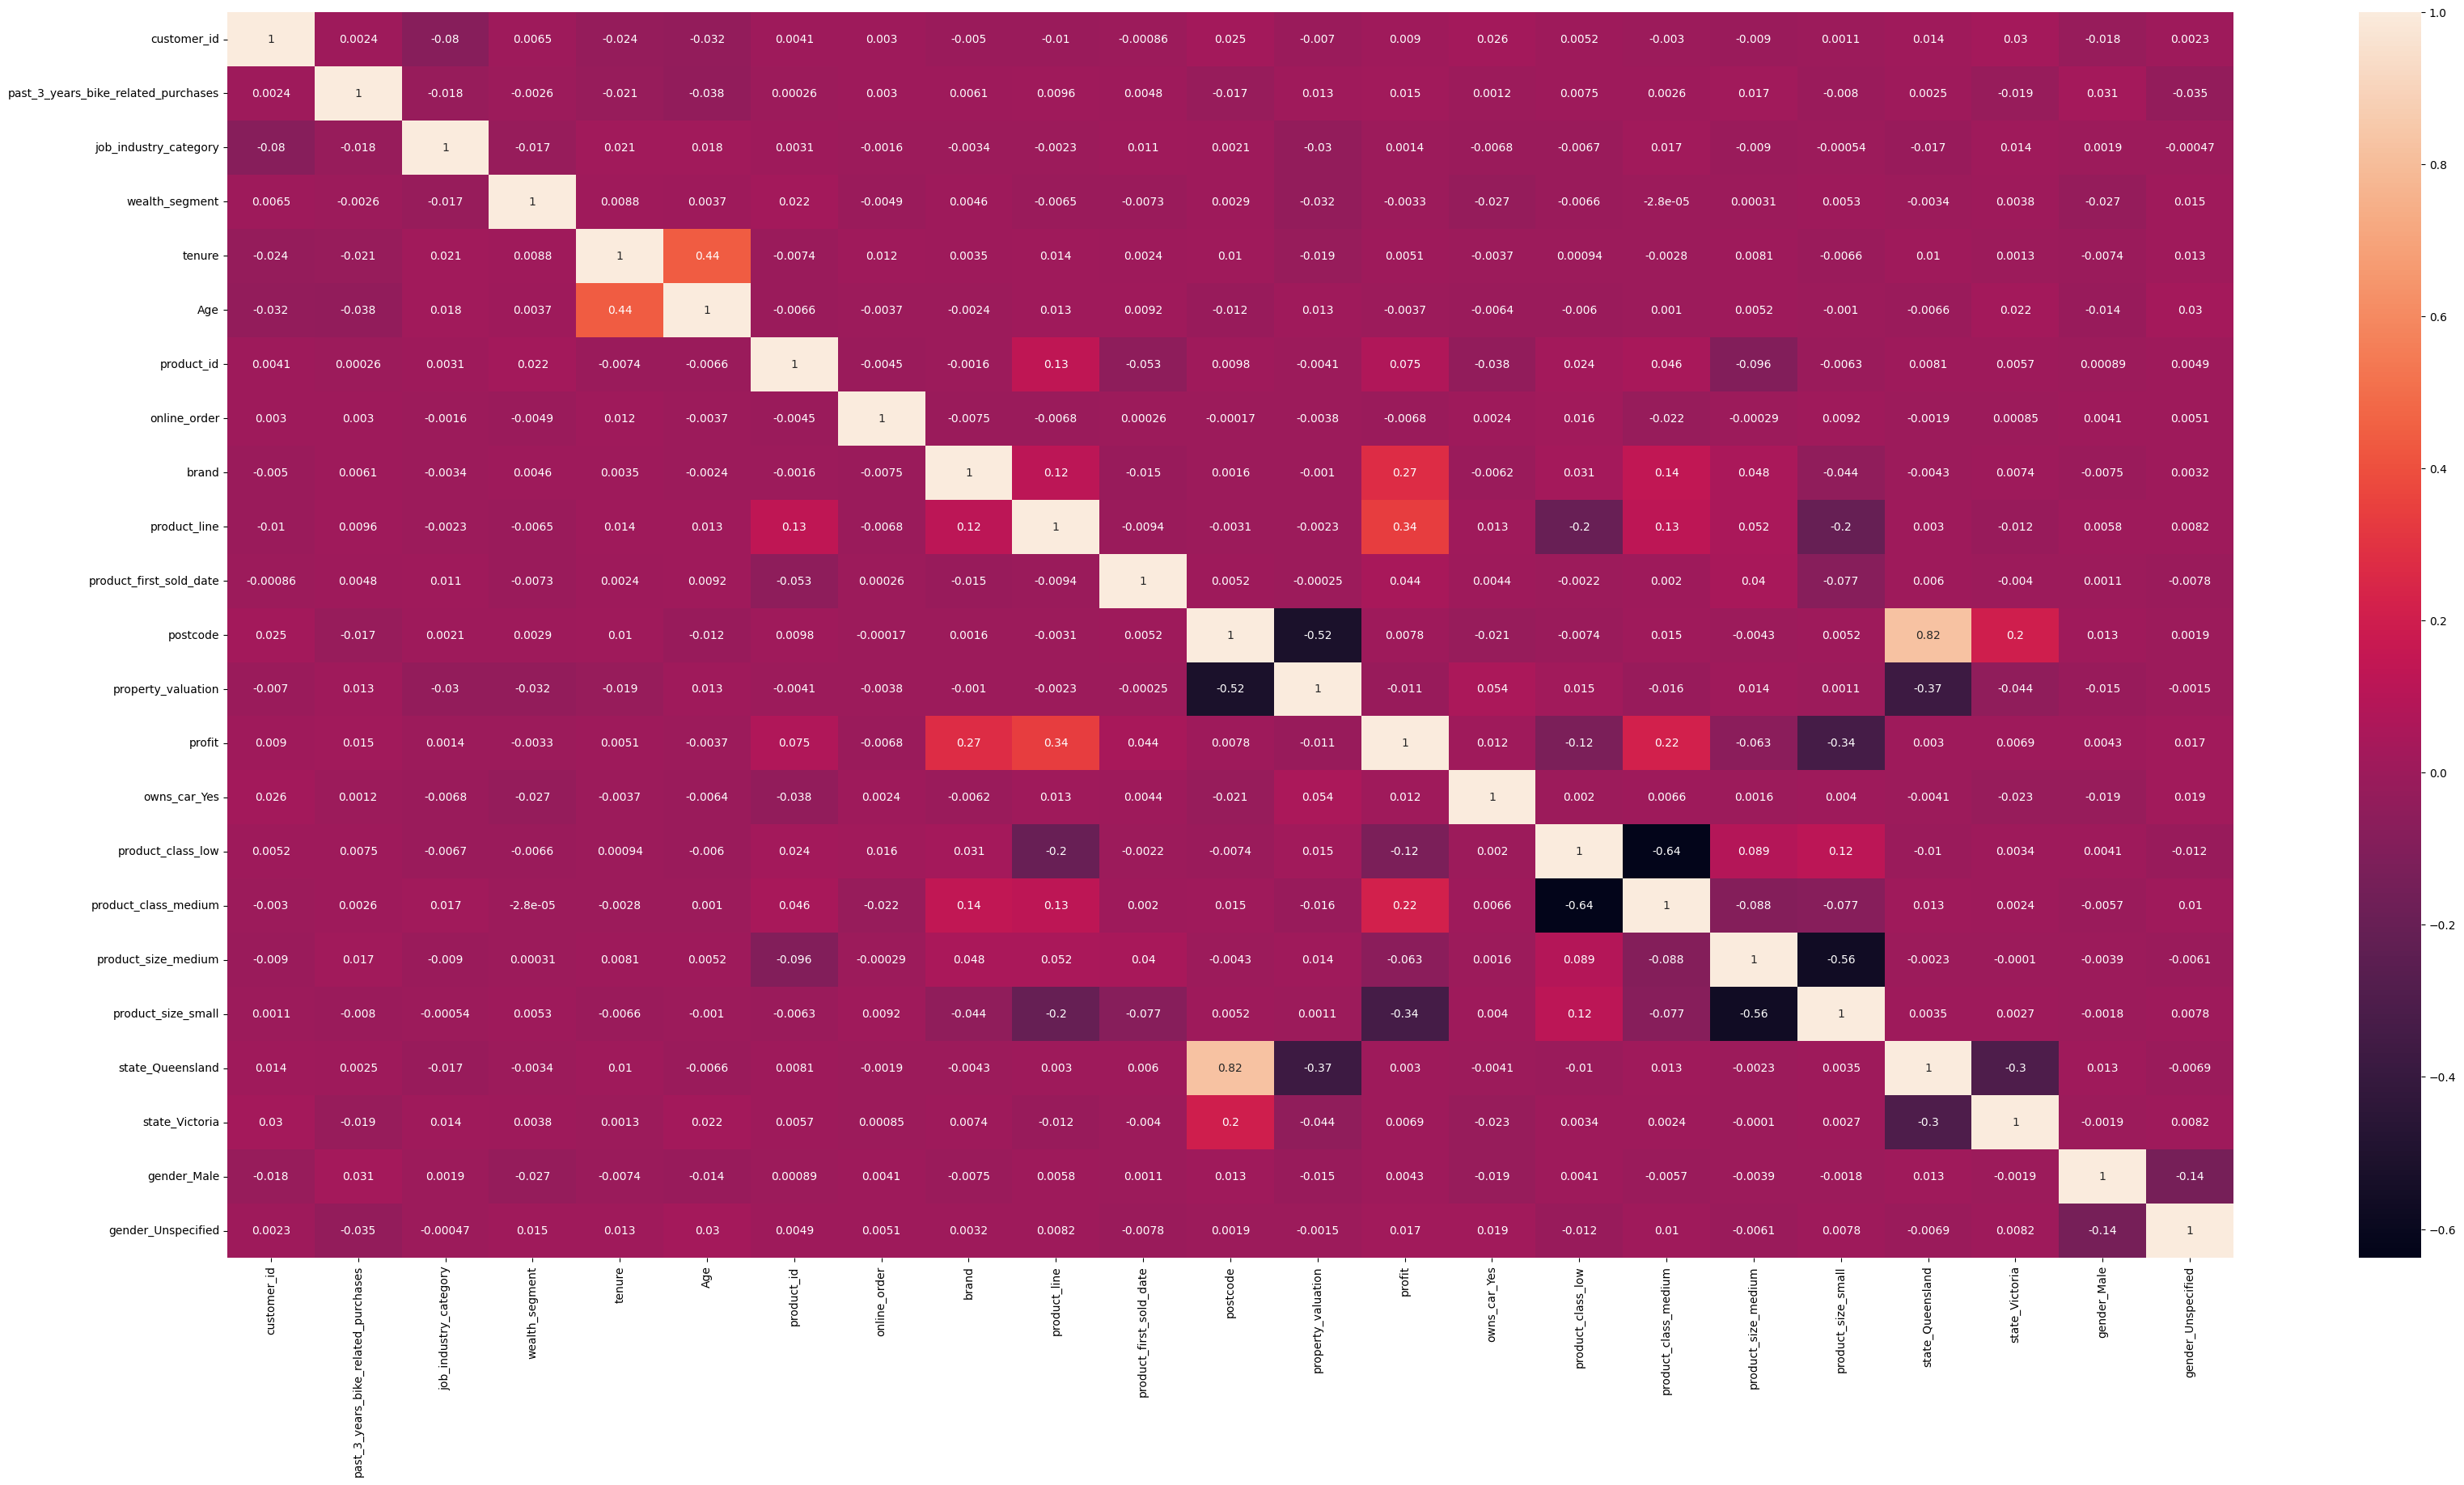

In [23]:
# Create a heatmap to visualize the correlation between columns in DataFrame 'b'
plt.figure(figsize=(40,20))
sns.heatmap(b.corr(),annot = True)
plt.show()

In [24]:
# Calculate the mean value of the 'profit' column in DataFrame 'b'
b['profit'].mean()

551.7849850746269

In [25]:
# Calculate and print the maximum and minimum values of the 'profit' column in DataFrame 'b'
print("max ",b['profit'].max())
print("min ",b['profit'].min())

max  1702.5499999999997
min  4.8


In [26]:
# Apply a lambda function to transform 'profit' values to binary values in DataFrame 'b'
b['profit'] = b['profit'].apply(lambda x : 0 if x < 552 else 1 )

In [27]:
# Count the occurrences of each unique value in the 'profit' column
b['profit'].value_counts()

0    11897
1     7868
Name: profit, dtype: int64

In [28]:
# Create the independent variable 'X' by dropping the 'profit' column from DataFrame 'b'
X= b.drop(['profit'],axis =1)

# Create the target variable 'y' by selecting the 'profit' column from DataFrame 'b'
y = b['profit']

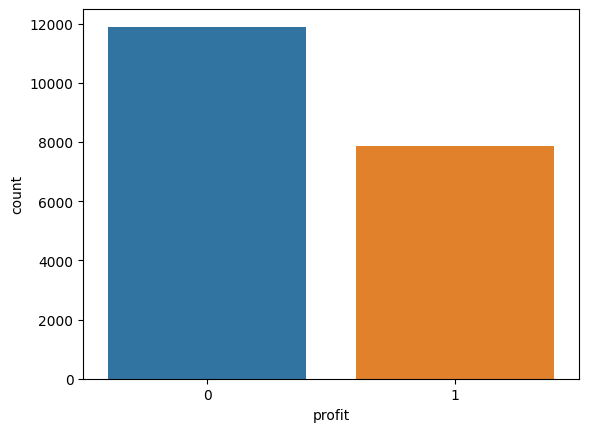

In [29]:
# Create a count plot to visualize the distribution of target variable 'y'
sns.countplot(x=y)
plt.show()

In [ ]:
# Import the SMOTE module from imbalanced-learn for data balancing
from imblearn.over_sampling import SMOTE

# Create a SMOTE (Synthetic Minority Over-sampling Technique) object
Smote = SMOTE()

# Assuming you have X as your feature matrix and y as the target variable
X_balanced,y_balanced = Smote.fit_resample(X,y)

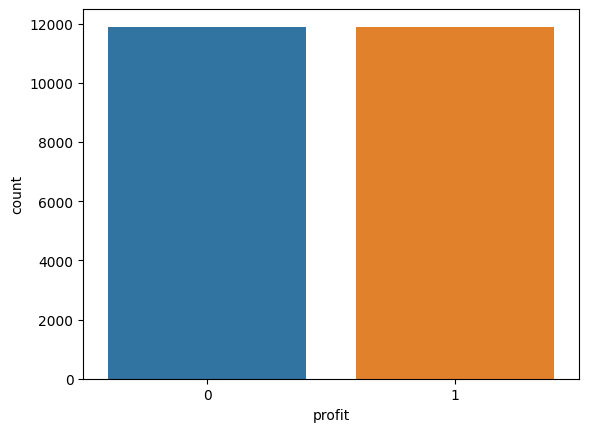

In [31]:
# Eaxming Balancing if the data
# Creating Count plot
sns.countplot(x=y_balanced)
plt.show()

In [32]:
# Import the train_test_split function from scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 'test_size=0.2' specifies that 20% of the data will be used for testing
# 'random_state=42' sets a random seed for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
# RFE -  (Recursive Feature Elimination) 

In [34]:
# Import the LogisticRegression model and Recursive Feature Elimination (RFE) from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [35]:
# Create an instance of the LogisticRegression model for estimation
estimate = LogisticRegression()

In [36]:
# Create an instance of RFE with Logistic Regression estimator
# Set 'n_features_to_select' to 20
selector = RFE(estimate,n_features_to_select=20)

# Fit the RFE selector on the training data
selector.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [37]:
# Get the selected feature columns based on the RFE selector's support
col = X_train.columns[selector.support_]

In [38]:
len(col)

20

In [39]:
# Select and assign the selected feature columns to the training and testing sets
X_train = X_train[col]
X_test = X_test[col]

In [40]:
# Import the statsmodels library and add a constant to the training and testing feature sets
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train,has_constant='add')
X_test_sm = sm.add_constant(X_test,has_constant='add')

In [41]:
# Create a Generalized Linear Model (GLM) for logistic regression using statsmodels
model = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15791
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7442.7
Date:                Sun, 30 Jul 2023   Deviance:                       14885.
Time:                        03:09:24   Pearson chi2:                 1.34e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3312
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [42]:
# Drop the 'product_size_small' column from the feature sets
X_train_sm.drop(['product_size_small'],axis = 1,inplace = True)
X_test_sm.drop(['product_size_small'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

# Fit the new GLM model to the training data
res2 = model2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15792
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9146.7
Date:                Sun, 30 Jul 2023   Deviance:                       18293.
Time:                        03:09:24   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1703
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [43]:
# Drop the 'online_order'
X_train_sm.drop(['online_order'],axis = 1,inplace = True)
X_test_sm.drop(['online_order'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

# Fit the new GLM model to the training data
res3 = model3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15793
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9146.7
Date:                Sun, 30 Jul 2023   Deviance:                       18293.
Time:                        03:09:24   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1703
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [44]:
# Drop the 'owns_car_Yes' column
X_train_sm.drop(['owns_car_Yes'],axis = 1,inplace = True)
X_test_sm.drop(['owns_car_Yes'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

# Fit the new GLM model to the training data
res4 = model4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15794
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9146.7
Date:                Sun, 30 Jul 2023   Deviance:                       18293.
Time:                        03:09:24   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1703
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [45]:
# Drop the 'property_valuation' column 
X_train_sm.drop(['property_valuation'],axis = 1,inplace = True)
X_test_sm.drop(['property_valuation'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res5 = model5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15795
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9146.9
Date:                Sun, 30 Jul 2023   Deviance:                       18294.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1703
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [46]:
# Drop the 'owns_car_Yes' column
X_train_sm.drop(['gender_Male'],axis = 1,inplace = True)
X_test_sm.drop(['gender_Male'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model6 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res6 = model6.fit()
print(res6.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15796
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9147.1
Date:                Sun, 30 Jul 2023   Deviance:                       18294.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1703
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [47]:
# Drop the 'job_industry_category' column
X_train_sm.drop(['job_industry_category'],axis = 1,inplace = True)
X_test_sm.drop(['job_industry_category'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model7 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res7 = model7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15797
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9147.6
Date:                Sun, 30 Jul 2023   Deviance:                       18295.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1702
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [48]:
# Drop the 'postcode' column
X_train_sm.drop(['postcode'],axis = 1,inplace = True)
X_test_sm.drop(['postcode'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model8 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res8 = model8.fit()
print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15798
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9148.2
Date:                Sun, 30 Jul 2023   Deviance:                       18296.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1702
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [49]:
# Drop the 'state_Victoria' column
X_train_sm.drop(['state_Victoria'],axis = 1,inplace = True)
X_test_sm.drop(['state_Victoria'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res9 = model9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15799
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9148.3
Date:                Sun, 30 Jul 2023   Deviance:                       18297.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1701
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [50]:
# Drop the 'state_Queensland' column
X_train_sm.drop(['state_Queensland'],axis = 1,inplace = True)
X_test_sm.drop(['state_Queensland'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model10 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res10 = model10.fit()
print(res10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15800
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9148.5
Date:                Sun, 30 Jul 2023   Deviance:                       18297.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1701
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [51]:
# Drop the 'tenure' column
X_train_sm.drop(['tenure'],axis = 1,inplace = True)
X_test_sm.drop(['tenure'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model11 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res11 = model11.fit()
print(res11.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15801
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9149.3
Date:                Sun, 30 Jul 2023   Deviance:                       18299.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1700
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [52]:
# Drop the 'Age' column
X_train_sm.drop(['Age'],axis = 1,inplace = True)
X_test_sm.drop(['Age'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model12 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res12 = model12.fit()
print(res12.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15802
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9150.0
Date:                Sun, 30 Jul 2023   Deviance:                       18300.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1700
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [53]:
# Drop the 'gender_Unspecified' column
X_train_sm.drop(['gender_Unspecified'],axis = 1,inplace = True)
X_test_sm.drop(['gender_Unspecified'],axis = 1, inplace = True)

# Create a new Generalized Linear Model (GLM) for logistic regression using statsmodels
model13 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res13 = model13.fit()
print(res13.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15803
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9151.5
Date:                Sun, 30 Jul 2023   Deviance:                       18303.
Time:                        03:09:25   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1698
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [54]:
# Import the variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty DataFrame to store VIF values
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns


# Calculate and store the VIF values for each feature in the "VIF" column
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,25.805280
1,past_3_years_bike_related_purchases,1.000569
2,wealth_segment,1.000980
3,product_id,1.040932
4,brand,1.067810
5,product_line,1.090811
6,product_class_low,1.793421
7,product_class_medium,1.764106
8,product_size_medium,1.028855


In [55]:
# Create predictions and assemble the training results in a DataFrame
train_pred=res13.predict(X_train_sm)

# Create a DataFrame 'train' containing predicted probabilities and actual target values
train=pd.DataFrame(train_pred,columns=["predicted_probs"])
train["actual"]=y_train

# Assign 1 if predicted probability is greater than 0.5, else assign 0
train["predicted"]=np.where(train["predicted_probs"]>0.5,1,0)# by default 0.5

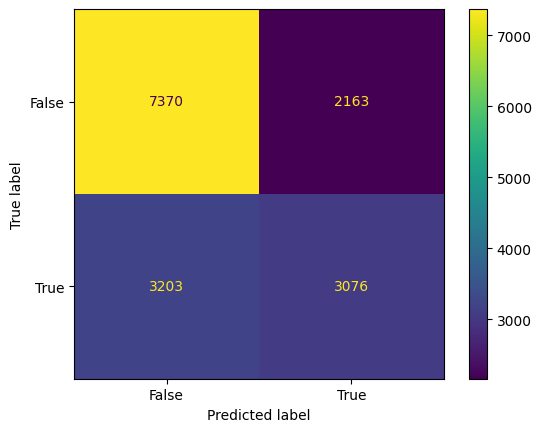

In [56]:
# Creating Confusion Matrix
from sklearn import metrics

# Calculate the confusion matrix using the actual and predicted values from the 'train' DataFrame
confusion_matrix=metrics.confusion_matrix(train["actual"],train["predicted"])

# Create a ConfusionMatrixDisplay for visualization
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
cm_display.plot()
plt.show()

In [57]:
# Print the testing accuracy, recall, and precision scores
print("Train Accuracy:",round(metrics.accuracy_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Recall:",round(metrics.recall_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Precision:",round(metrics.precision_score(train["actual"],train["predicted"])*100,2),"%")

Train Accuracy: 66.06 %
Train Recall: 48.99 %
Train Precision: 58.71 %


In [58]:
# Create predictions and assemble the testing results in a DataFrame
test_pred=res13.predict(X_test_sm)
test=pd.DataFrame(test_pred,columns=["predicted_probs"])
test["actual"]=y_test

# Assign 1 if predicted probability is greater than 0.5, else assign 0
test["predicted"]=np.where(test["predicted_probs"]>0.5,1,0)# by default 0.5


In [59]:
# Printing the test accuracy, recall and precision
print("Test Accuracy:",round(metrics.accuracy_score(test["actual"],test["predicted"])*100,2),"%")
print("Test Recall:",round(metrics.recall_score(test["actual"],test["predicted"])*100,2),"%")
print("Test Precision:",round(metrics.precision_score(test["actual"],test["predicted"])*100,2),"%")

Test Accuracy: 66.23 %
Test Recall: 50.03 %
Test Precision: 59.51 %


In [60]:
# Import necessary modules and calculate ROC curve and AUC score
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,test_pred)

# Print the ROC AUC score and the AUC score
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.7357789221370696
Auc_score =  0.7357789221370696


Text(0.5, 0, 'False Positive Rate')

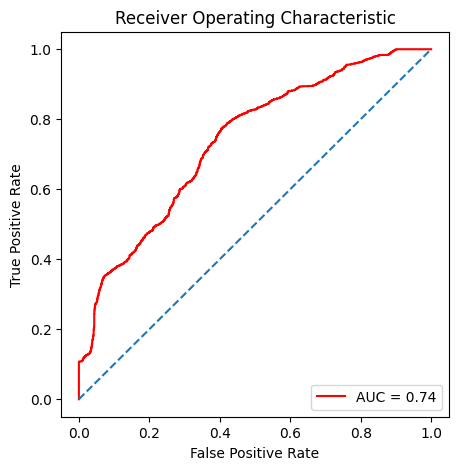

In [61]:
# Import the necessary module and create the ROC curve plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))# Set the size of the plot
plt.title('Receiver Operating Characteristic')

# Plot the ROC curve with the true positive rate and false positive rate
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right') # Add a legend to the plot
plt.plot([0, 1], [0, 1],linestyle='--')

# Set the axis labels
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [62]:
# Decision Tree

In [63]:
# Import the DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Create an instance of the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [65]:
# Import KFold and GridSearchCV modules from scikit-learn for cross-validation and hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [66]:
# Define a dictionary of hyperparameters for the Decision Tree
parametre = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(0,10),
    'min_samples_split': range(0,10),
    'min_samples_leaf': range(0,10)
}

In [67]:
# Create a GridSearchCV instance for hyperparameter tuning
tree = GridSearchCV(dtree,parametre,cv= 5,scoring='accuracy',return_train_score=True)

In [68]:
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [69]:
# Fit the GridSearchCV instance on the training data
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [70]:
# Create a GridSearchCV instance for hyperparameter tuning and fit it on the training data
grid_search = GridSearchCV(dtree, parametre, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)})

In [71]:
# Predict the target values using the best model from the grid search on the testing data
y_pred_test = grid_search.predict(X_test)

In [72]:
# Calculate the accuracy score of the predicted values compared to the actual values
metrics.accuracy_score(y_test,y_pred_test)

0.9165190994181635

In [73]:
# Predict the class probabilities on the training data using the best model from the grid search
y_prob_train = grid_search.predict(X_train)

In [74]:
# Calculate the accuracy score of the predicted labels compared to the actual labels in the training data
metrics.accuracy_score(y_train,y_prob_train)

0.9257525929673666

In [75]:
# Calculate the ROC curve and AUC using predicted probabilities
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,y_pred_test)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.9250451762806691
Auc_score =  0.9250451762806691


Text(0.5, 0, 'False Positive Rate')

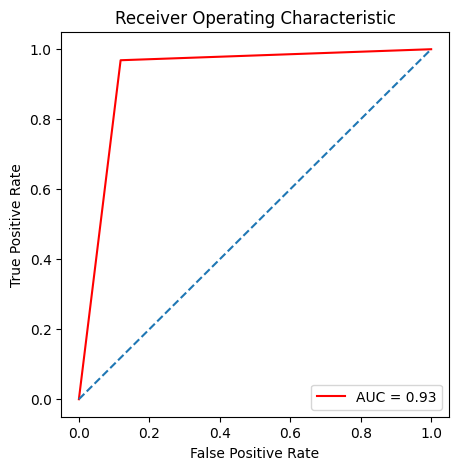

In [76]:
# Import the necessary module and create the ROC curve plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')

# Plot the ROC curve with the true positive rate and false positive rate
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

# Set the axis labels
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [77]:
#Random Forest

In [78]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Create an instance of RandomForestClassifier and fit it on the training data
Model_RFC = RandomForestClassifier(random_state=42)
Model_RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Define a dictionary of hyperparameters for the RandomForestClassifier
parametre_ran={
      'n_estimators': range(0,10),
    'max_depth': range(0,5),
    'min_samples_split': range(0,5),
    'min_samples_leaf': range(0,5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [81]:
# Create a GridSearchCV instance for hyperparameter tuning for the RandomForestClassifier
grid_random = GridSearchCV(Model_RFC,parametre_ran,cv= 5,scoring='accuracy',return_train_score=True)

In [82]:
# Fit the GridSearchCV instance on the training data
grid_random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 5),
                         'n_estimators': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [83]:
# Predict the target values using the best model from the grid search on the testing data
y_pred_random = grid_random.predict(X_test)

In [84]:
# Calculate the accuracy score of the predicted values compared to the actual values
metrics.accuracy_score(y_test,y_pred_random)

0.7389324563622565

In [85]:
y_pred_random

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [86]:
# Predict the target values using the best model from the grid search on the training data
y_pred_random_t = grid_random.predict(X_train)

In [87]:
# Calculate the accuracy score of the predicted values compared to the actual values in the training data
metrics.accuracy_score(y_train,y_pred_random_t)

0.7367821907412092

In [88]:
# Calculate the ROC curve and AUC using predicted values on the testing data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_random)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,y_pred_random)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.6819726940397125
Auc_score =  0.6819726940397125


Text(0.5, 0, 'False Positive Rate')

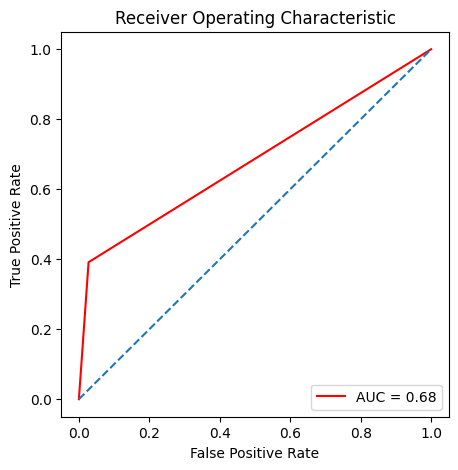

In [89]:
# Import the necessary module and create the ROC curve plot for the RandomForestClassifier
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')

# Plot the ROC curve with the true positive rate and false positive rate
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

# Set the axis labels and other formatting
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [90]:
# New Customer

In [91]:
New_customer = pd.read_excel('new_customer.xlsx')

In [92]:
New_customer.head()

,Unnamed: 0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,0,Chickie,Brister,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0
1,1,Morly,Genery,Male,69,1970-03-22,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0
2,2,Ardelis,Forrester,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0
3,3,Lucine,Stutt,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0
4,4,Melinda,Hadlee,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0


In [93]:
# Removing the 'Unnamed: 0' column from the 'new_customer' dataset
New_customer.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [94]:
New_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0
1,Morly,Genery,Male,69,1970-03-22,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0
2,Ardelis,Forrester,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0
3,Lucine,Stutt,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0


In [95]:
# New Data frame

In [96]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing

# Custom transformer class to drop specified columns
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)

# Custom transformer class for data transformation
class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, state_mapping, label_encoding, hot_encoding):
        self.label_encoding = label_encoding
        self.hot_encoding = hot_encoding
        self.state_mapping = state_mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Replace values in 'state' column using the mapping dictionary
        X['state'] = X['state'].replace(self.state_mapping)
        
        # Label Encoding
        label_encoder = preprocessing.LabelEncoder()
        for column in self.label_encoding:
            X[column] = label_encoder.fit_transform(X[column])

        # Hot Encoding
        for column in self.hot_encoding:
            X = pd.get_dummies(X, columns=[column], drop_first=True)

        return X

def transform_pipeline(file_path):
    try:
        # Step 1: Data loading
        df = pd.read_excel(file_path)

        # Step 2: Replace values in 'state' column using the mapping dictionary
        state_mapping = {
            'QLD': 'Queensland',
            'VIC': 'Victoria',
            'NSW': 'New South Wales'
        }

        # Step 3: Dropping columns
        list_to_drop = ['Unnamed: 0', 'first_name', 'last_name', 'country', 'DOB', 'address', 'Rank', 'Value']
        drop_columns_transformer = ColumnDropper(columns_to_drop=list_to_drop)
        df = drop_columns_transformer.transform(df)


        

        # Step 4: Data transformation (with label encoding and state replacement)
        label_encoding = ['wealth_segment', 'state', 'job_industry_category']
        hot_encoding = ['owns_car', 'state', 'gender']
        data_transformer = DataTransformer(label_encoding=label_encoding, hot_encoding=hot_encoding, state_mapping=state_mapping)
        df = data_transformer.transform(df)

        return df

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Example usage:
if __name__ == "__main__":
    transformed_df = transform_pipeline('new_customer.xlsx')
    if transformed_df is not None:
        print("DataFrame after pipeline transformation:")
        print(transformed_df.head())


DataFrame after pipeline transformation:
   past_3_years_bike_related_purchases  job_industry_category  wealth_segment  \
0                                   86                      5               2   
1                                   69                      6               2   
2                                   10                      2               0   
3                                   64                      5               0   
4                                   34                      2               0   

   tenure  postcode  property_valuation   Age  owns_car_Yes  state_1  state_2  \
0      14      4500                   6  60.0             1        1        0   
1      16      2113                  11  47.0             0        0        0   
2      10      3505                   5  43.0             0        0        1   
3       5      4814                   1  38.0             1        1        0   
4      19      2093                   9  52.0             0        

In [97]:
y_pred_random_t

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [98]:
# reverse engineering

In [99]:
type(y_pred_test)

numpy.ndarray

In [100]:
# Creating a DataFrame named 'test_data' using the predicted values 'y_pred_test'
test_data= pd.DataFrame(y_pred_test)

In [101]:
# Creating a DataFrame named 'train_data' using the predicted probabilities 'y_prob_train'
train_data = pd.DataFrame(y_prob_train)

In [102]:
# Displaying the contents of the 'train_data' DataFrame
train_data

,0
0,0
1,1
2,1
3,1
4,0
...,...
15807,1
15808,1
15809,1
15810,0


In [103]:
# Combining the 'train_data' and 'test_data' DataFrames using pd.concat()

combined = pd.concat([train_data,test_data])

In [104]:
# Resetting the index of the 'combined' DataFrame while dropping the previous index
combined = combined.reset_index(drop=True)

In [108]:
# Adding a new column 'Predicted' to the existing DataFrame and populating it with values from 'combined'
DataFrame['Predicted'] = combined

In [109]:
DataFrame.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation,Predicted
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,235.63,125.07,38482,060 Morning Avenue,2016,New South Wales,Australia,10,0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,1577.53,826.51,39526,060 Morning Avenue,2016,New South Wales,Australia,10,1
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,small,1720.70,1531.42,37823,060 Morning Avenue,2016,New South Wales,Australia,10,1
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,360.40,270.30,37873,060 Morning Avenue,2016,New South Wales,Australia,10,1
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,71.49,53.62,38573,060 Morning Avenue,2016,New South Wales,Australia,10,0


In [111]:
# Calculate the value counts of 'wealth_segment' for predicted values equal to 0
profit_0 = DataFrame[DataFrame['Predicted'] == 0]['wealth_segment'].value_counts()

In [113]:
# Calculate the value counts of 'wealth_segment' for predicted values equal to 1
profit_1 = DataFrame[DataFrame['Predicted']== 1]['wealth_segment'].value_counts()

In [114]:
profit_0

Mass Customer        5422
High Net Worth       2818
Affluent Customer    2625
Name: wealth_segment, dtype: int64

In [115]:
profit_1

Mass Customer        4501
High Net Worth       2222
Affluent Customer    2177
Name: wealth_segment, dtype: int64